In [13]:
import pandas as pd

descriptors_df = pd.read_csv('/content/descriptors.csv')
fingerprints_df = pd.read_csv('/content/fingerprints.csv')
solubility_df = pd.read_csv('/content/solubility_data.csv')

print("Descriptors DataFrame:")
display(descriptors_df.head())
print("\nFingerprints DataFrame:")
display(fingerprints_df.head())
print("\nSolubility DataFrame:")
display(solubility_df.head())

Descriptors DataFrame:


,smiles,Constitutional_indices_MW,Constitutional_indices_AMW,Constitutional_indices_Sv,Constitutional_indices_Se,Constitutional_indices_Sp,Constitutional_indices_Si,Constitutional_indices_Mv,Constitutional_indices_Me,Constitutional_indices_Mp,...,Molecular_properties_AMR,Molecular_properties_TPSA(NO),Molecular_properties_TPSA(Tot),Molecular_properties_MLOGP,Molecular_properties_Vx,Molecular_properties_VvdwMG,Molecular_properties_VvdwZAZ,Molecular_properties_BLTF96,Molecular_properties_BLTD48,Molecular_properties_BLTA96
0,C(c1ccccc1)n1ccnc1,158.22,7.192,14.150,21.738,15.057,24.657,0.643,0.988,0.684,...,48.522,17.82,17.82,1.908,213.455,90.859,143.84,-3.01,-3.13,-3.14
1,C=CCC1(C(=O)NC(=O)NC1=O)c1ccccc1,244.27,8.142,19.821,30.604,20.182,33.701,0.661,1.020,0.673,...,64.391,75.27,75.27,0.971,298.638,125.770,227.73,-2.22,-2.24,-2.20
2,C=CCC1(CC=C)C(=O)NC(=O)NC1=O,208.24,7.713,16.821,27.604,17.182,30.701,0.623,1.022,0.636,...,53.543,75.27,75.27,0.289,260.748,110.241,204.37,-1.64,-1.59,-1.52
3,CC#C[C@]1(O)CC[C@H]2[C@@H]3CCC4=CC(=O)CCC4=C3[...,429.65,6.413,40.407,65.778,43.858,74.976,0.603,0.982,0.655,...,132.656,40.54,40.54,4.795,585.532,243.349,445.02,-5.47,-5.88,-6.02
4,CC(=O)CCCCn1c(=O)n(C)c2ncn(C)c2c1=O,278.35,7.325,22.918,38.574,23.716,43.528,0.603,1.015,0.624,...,73.024,78.89,78.89,1.356,346.080,145.213,255.01,-2.54,-2.61,-2.59



Fingerprints DataFrame:


,smiles,fp0,fp1,fp2,fp3,fp4,fp5,fp6,fp7,fp8,...,fp5110,fp5111,fp5112,fp5113,fp5114,fp5115,fp5116,fp5117,fp5118,fp5119
0,C(c1ccccc1)n1ccnc1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,C=CCC1(C(=O)NC(=O)NC1=O)c1ccccc1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,C=CCC1(CC=C)C(=O)NC(=O)NC1=O,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CC#C[C@]1(O)CC[C@H]2[C@@H]3CCC4=CC(=O)CCC4=C3[...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CC(=O)CCCCn1c(=O)n(C)c2ncn(C)c2c1=O,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0



Solubility DataFrame:


,smiles,logS0,random,diversity
0,C(\C=C\c1ccccc1)N1CCN(CC1)C(c1ccccc1)c1ccccc1,-5.340,0,1
1,C(c1ccccc1)n1ccnc1,-2.260,0,1
2,C1Cc2ccccc2N1,-1.040,0,1
3,C1O[C@H]1c1ccccc1,-1.600,1,2
4,C=CCC1(C(=O)NC(=O)NC1=O)c1ccccc1,-2.346,0,1


In [14]:
# Data preparation
# Data separation as X and y
y = solubility_df['logS0']
display(y)

,logS0
0,-5.3400
1,-2.2600
2,-1.0400
3,-1.6000
4,-2.3460
...,...
824,-1.6180
825,0.0205
826,-3.4840
827,-1.1600


In [15]:
# Combine descriptors and fingerprints for feature set X
X = pd.merge(descriptors_df, fingerprints_df, on='smiles', how='inner').drop('smiles', axis=1)
# Drop rows with missing values
X = X.dropna()
display(X.head())

,Constitutional_indices_MW,Constitutional_indices_AMW,Constitutional_indices_Sv,Constitutional_indices_Se,Constitutional_indices_Sp,Constitutional_indices_Si,Constitutional_indices_Mv,Constitutional_indices_Me,Constitutional_indices_Mp,Constitutional_indices_Mi,...,fp5110,fp5111,fp5112,fp5113,fp5114,fp5115,fp5116,fp5117,fp5118,fp5119
0,158.22,7.192,14.150,21.738,15.057,24.657,0.643,0.988,0.684,1.121,...,0,0,0,0,0,0,0,0,0,0
1,244.27,8.142,19.821,30.604,20.182,33.701,0.661,1.020,0.673,1.123,...,0,0,0,0,0,0,0,0,0,0
2,208.24,7.713,16.821,27.604,17.182,30.701,0.623,1.022,0.636,1.137,...,0,0,0,0,0,0,0,0,0,0
3,429.65,6.413,40.407,65.778,43.858,74.976,0.603,0.982,0.655,1.119,...,0,0,0,0,0,0,0,0,0,0
4,278.35,7.325,22.918,38.574,23.716,43.528,0.603,1.015,0.624,1.145,...,0,0,0,0,0,0,0,0,0,0


In [16]:
## Data splitting
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [17]:
X_test

,Constitutional_indices_MW,Constitutional_indices_AMW,Constitutional_indices_Sv,Constitutional_indices_Se,Constitutional_indices_Sp,Constitutional_indices_Si,Constitutional_indices_Mv,Constitutional_indices_Me,Constitutional_indices_Mp,Constitutional_indices_Mi,...,fp5110,fp5111,fp5112,fp5113,fp5114,fp5115,fp5116,fp5117,fp5118,fp5119
711,171.24,8.562,12.745,20.367,13.608,22.498,0.637,1.018,0.680,1.125,...,0,0,0,0,0,0,0,0,0,0
706,122.18,6.431,11.349,18.745,12.261,21.285,0.597,0.987,0.645,1.120,...,0,0,0,0,0,0,0,0,0,0
774,184.25,7.087,16.876,25.629,18.023,28.701,0.649,0.986,0.693,1.104,...,0,0,0,0,0,0,0,0,0,0
19,416.63,6.830,36.475,60.523,39.648,68.401,0.598,0.992,0.650,1.121,...,0,1,0,0,0,0,0,0,0,0
623,102.20,4.867,10.402,20.513,11.784,24.116,0.495,0.977,0.561,1.148,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,232.23,8.601,17.068,28.371,16.847,31.716,0.632,1.051,0.624,1.175,...,0,0,0,0,0,0,0,0,0,0
726,143.02,9.535,9.004,15.393,9.977,17.173,0.600,1.026,0.665,1.145,...,0,0,0,0,0,0,0,0,0,0
685,89.11,6.855,7.031,13.407,7.199,15.163,0.541,1.031,0.554,1.166,...,0,0,0,0,0,0,0,0,0,0
689,119.14,7.008,9.273,17.618,9.415,19.787,0.545,1.036,0.554,1.164,...,0,0,0,0,0,0,0,0,0,0


In [18]:
# Model Building
# Linear Regression
# Training the model
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [19]:
# Applying the model to make a prediction
y_lr_train_pred = lr.predict(X_train)
y_lr_test_pred = lr.predict(X_test)

In [20]:
# Evaluate model performance
from sklearn.metrics import mean_squared_error, r2_score

lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)

lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)

In [21]:
print('LR MSE (Train): ', lr_train_mse)
print('LR R2 (Train): ', lr_train_r2)
print('LR MSE (Test): ', lr_test_mse)
print('LR R2 (Test): ', lr_test_r2)

LR MSE (Train):  0.02320350926050493
LR R2 (Train):  0.9910251812033091
LR MSE (Test):  6.438598625284822
LR R2 (Test):  -1.4226138695413661


In [22]:
lr_results = pd.DataFrame(['Linear regression', lr_train_mse, lr_train_r2, lr_test_mse, lr_test_r2]).transpose()
lr_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']

In [23]:
lr_results


,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear regression,0.023204,0.991025,6.438599,-1.422614


In [24]:
# Random Forest
# Training the model
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth=2, random_state=100)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=2, random_state=100)

In [25]:
# Applying the model to make a prediction
y_rf_train_pred = rf.predict(X_train)
y_rf_test_pred = rf.predict(X_test)

In [26]:
# Evaluate model performance
from sklearn.metrics import mean_squared_error, r2_score

rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)
rf_train_r2 = r2_score(y_train, y_rf_train_pred)

rf_test_mse = mean_squared_error(y_test, y_rf_test_pred)
rf_test_r2 = r2_score(y_test, y_rf_test_pred)

In [27]:
rf_results = pd.DataFrame(['Random forest', rf_train_mse, rf_train_r2, rf_test_mse, rf_test_r2]).transpose()
rf_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']
rf_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Random forest,2.373371,0.082011,2.6649,-0.002707


In [28]:
# Model comparison
df_models = pd.concat([lr_results, rf_results], axis=0)

In [29]:
df_models.reset_index(drop=True)

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear regression,0.023204,0.991025,6.438599,-1.422614
1,Random forest,2.373371,0.082011,2.6649,-0.002707


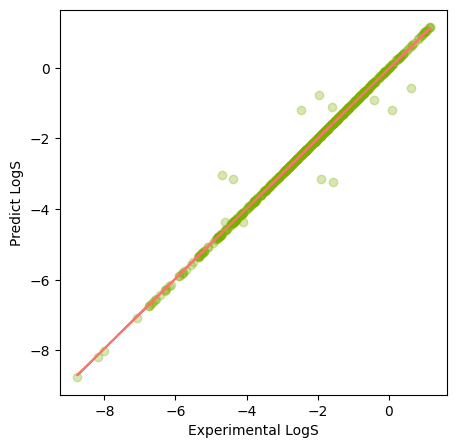

In [30]:
# Data visualization of prediction results
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5,5))
plt.scatter(x=y_train, y=y_lr_train_pred, c="#7CAE00" ,alpha=0.3)

z = np.polyfit(y_train, y_lr_train_pred, 1)
p = np.poly1d(z)

plt.plot(y_train, p(y_train), '#F8766D')
plt.ylabel('Predict LogS')
plt.xlabel('Experimental LogS')
plt.savefig('logS.png')
plt.savefig('logS.pdf')
plt.show()

#

The scatter plot shows the relationship between the experimental LogS values (Experimental LogS on the x-axis) and the predicted LogS values from the Linear Regression model (Predict LogS on the y-axis) for the training data.

The points are scattered around a red line, which represents the ideal scenario where predicted values exactly match experimental values. The fact that the points are tightly clustered around this line suggests a strong positive correlation between the experimental and predicted values for the training set, indicating that the Linear Regression model performed well on the data it was trained on.

In [31]:
!pip install plotly

In [32]:
import plotly.express as px

fig = px.scatter(x=y_train, y=y_lr_train_pred, labels={'x': 'Experimental LogS', 'y': 'Predicted LogS (Linear Regression - Train)'}, title='Experimental vs. Predicted LogS (Linear Regression - Train)')
fig.show()

# The Plotly scatter plot also shows the relationship between the experimental LogS values (Experimental LogS on the x-axis) and the predicted LogS values from the Linear Regression model (Predicted LogS (Linear Regression - Train) on the y-axis) for the training data.

Similar to the Matplotlib plot, the points are clustered around a diagonal line (although not explicitly plotted in the Plotly figure by default), indicating a strong positive correlation between the experimental and predicted values for the training set. This reinforces the observation that the Linear Regression model performed well on the training data.


In [33]:
import plotly.express as px

fig = px.scatter(x=y_train, y=y_rf_train_pred, labels={'x': 'Experimental LogS', 'y': 'Predicted LogS (Random Forest - Train)'}, title='Experimental vs. Predicted LogS (Random Forest - Train)')
fig.show()

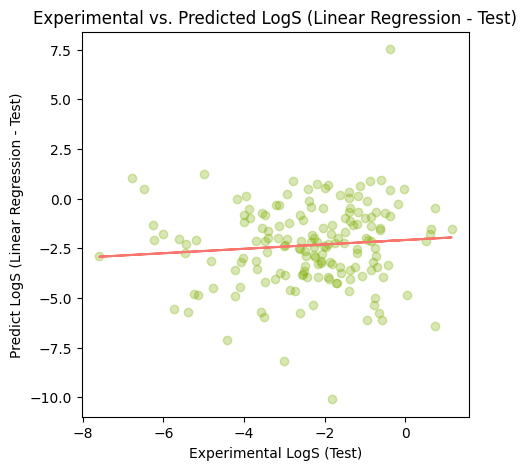

In [34]:
# Matplotlib scatter plot for Linear Regression Test data
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5,5))
plt.scatter(x=y_test, y=y_lr_test_pred, c="#7CAE00" ,alpha=0.3)

z = np.polyfit(y_test, y_lr_test_pred, 1)
p = np.poly1d(z)

plt.plot(y_test, p(y_test), '#F8766D')
plt.ylabel('Predict LogS (Linear Regression - Test)')
plt.xlabel('Experimental LogS (Test)')
plt.title('Experimental vs. Predicted LogS (Linear Regression - Test)')
plt.show()

In [35]:
# Plotly interactive scatter plot for Linear Regression Test data
import plotly.express as px

fig = px.scatter(x=y_test, y=y_lr_test_pred, labels={'x': 'Experimental LogS', 'y': 'Predicted LogS (Linear Regression - Test)'}, title='Experimental vs. Predicted LogS (Linear Regression - Test)')
fig.show()

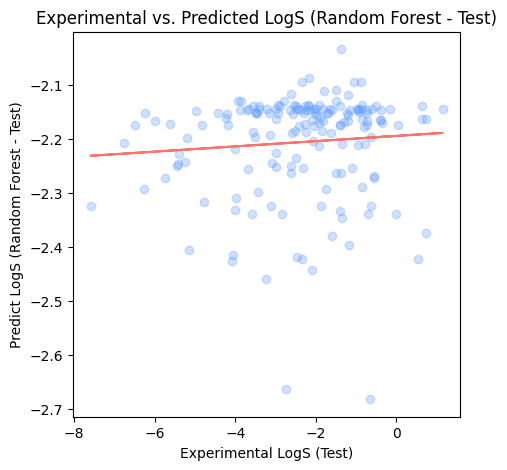

In [36]:
# Matplotlib scatter plot for Random Forest Test data
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5,5))
plt.scatter(x=y_test, y=y_rf_test_pred, c="#619CFF" ,alpha=0.3) # Using a different color for distinction

z = np.polyfit(y_test, y_rf_test_pred, 1)
p = np.poly1d(z)

plt.plot(y_test, p(y_test), '#F8766D')
plt.ylabel('Predict LogS (Random Forest - Test)')
plt.xlabel('Experimental LogS (Test)')
plt.title('Experimental vs. Predicted LogS (Random Forest - Test)')
plt.show()

In [37]:
# Plotly interactive scatter plot for Random Forest Test data
import plotly.express as px

fig = px.scatter(x=y_test, y=y_rf_test_pred, labels={'x': 'Experimental LogS', 'y': 'Predicted LogS (Random Forest - Test)'}, title='Experimental vs. Predicted LogS (Random Forest - Test)')
fig.show()

# Interpretation of the scatter and Plotly plots for both models and datasets.

Linear Regression Model:

    Training Data (Matplotlib and Plotly): The scatter plots show a strong linear relationship between experimental and predicted LogS values, with points tightly clustered around the diagonal line. This is consistent with the high R2 score (0.9910) and low MSE (0.0232) on the training set, indicating that the Linear Regression model fits the training data very well.
    Testing Data (Matplotlib and Plotly): The scatter plots for the test data show a much weaker correlation between experimental and predicted LogS values. The points are widely scattered, and there is no clear linear trend. This is reflected in the very low (negative) R2 score (-1.4226) and high MSE (6.4386) on the test set, indicating that the Linear Regression model performs poorly on unseen data and is likely overfitting the training data.

Random Forest Model:

    Training Data (Plotly): The scatter plot for the training data shows some correlation between experimental and predicted LogS values, but the points are more spread out compared to the Linear Regression training plot. This is consistent with the lower R2 score (0.0820) and higher MSE (2.3734) on the training set compared to Linear Regression, suggesting a less perfect fit to the training data.
    Testing Data (Matplotlib and Plotly): The scatter plots for the test data show a similar level of scatter as the training data plot for the Random Forest model. The R2 score (-0.0027) and MSE (2.6649) on the test set are also closer to the training set metrics compared to the Linear Regression model. While the performance on the test set is still not great (R2 is close to zero), it is significantly better than the Linear Regression model's performance on the test set, suggesting that the Random Forest model generalizes slightly better to unseen data, although it still struggles to capture the underlying relationship effectively with the current hyperparameter settings (max_depth=2).

In summary, the Linear Regression model heavily overfits the training data, while the Random Forest model with max_depth=2 has poor performance on both training and testing data. The Random Forest model generalizes slightly better than Linear Regression but neither model is performing well on this dataset with their current configurations.

# Support Vector Regression model

In [38]:
# Import SVR
from sklearn.svm import SVR

In [39]:
# Initialize and trai the SVR
svr = SVR()
svr.fit(X_train, y_train)

SVR()

In [40]:
# Make  Predictions;
y_svr_train_pred = svr.predict(X_train)
y_svr_test_pred = svr.predict(X_test)

In [41]:
# Evaluate the SVR performance:
from sklearn.metrics import mean_squared_error, r2_score

svr_train_mse = mean_squared_error(y_train, y_svr_train_pred)
svr_train_r2 = r2_score(y_train, y_svr_train_pred)

svr_test_mse = mean_squared_error(y_test, y_svr_test_pred)
svr_test_r2 = r2_score(y_test, y_svr_test_pred)

print('SVR MSE (Train): ', svr_train_mse)
print('SVR R2 (Train): ', svr_train_r2)
print('SVR MSE (Test): ', svr_test_mse)
print('SVR R2 (Test): ', svr_test_r2)

SVR MSE (Train):  2.5835878232666594
SVR R2 (Train):  0.0007014758486254546
SVR MSE (Test):  2.769585177043201
SVR R2 (Test):  -0.04209562565863889


In [42]:
# Store and display the results
svr_results = pd.DataFrame(['Support Vector Regression', svr_train_mse, svr_train_r2, svr_test_mse, svr_test_r2]).transpose()
svr_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']

# Update df_models with the new SVR results and display the combined table
# Ensure that the SVR row is not duplicated if this is run after the initial SVR implementation
if 'Support Vector Regression' not in df_models['Method'].values:
    df_models = pd.concat([df_models, svr_results], axis=0)

display(df_models.reset_index(drop=True))

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear regression,0.023204,0.991025,6.438599,-1.422614
1,Random forest,2.373371,0.082011,2.6649,-0.002707
2,Support Vector Regression,2.583588,0.000701,2.769585,-0.042096


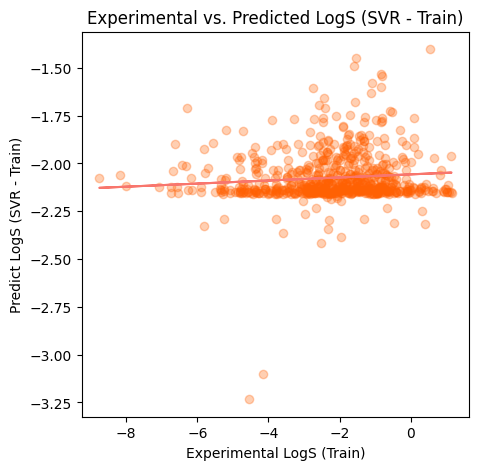

In [43]:
# Matplotlib scatter plot for SVR Training data
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5,5))
plt.scatter(x=y_train, y=y_svr_train_pred, c="#FF6103" ,alpha=0.3) # Using a different color for distinction

z = np.polyfit(y_train, y_svr_train_pred, 1)
p = np.poly1d(z)

plt.plot(y_train, p(y_train), '#F8766D')
plt.ylabel('Predict LogS (SVR - Train)')
plt.xlabel('Experimental LogS (Train)')
plt.title('Experimental vs. Predicted LogS (SVR - Train)')
plt.show()

In [44]:
# Plotly interactive scatter plot for SVR Training data
import plotly.express as px

fig = px.scatter(x=y_train, y=y_svr_train_pred, labels={'x': 'Experimental LogS', 'y': 'Predicted LogS (SVR - Train)'}, title='Experimental vs. Predicted LogS (SVR - Train)')
fig.show()

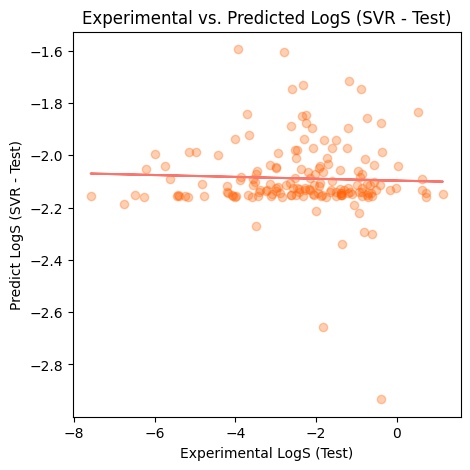

In [45]:
# Matplotlib scatter plot for SVR Test data
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5,5))
plt.scatter(x=y_test, y=y_svr_test_pred, c="#FF6103" ,alpha=0.3) # Using a different color for distinction

z = np.polyfit(y_test, y_svr_test_pred, 1)
p = np.poly1d(z)

plt.plot(y_test, p(y_test), '#F8766D')
plt.ylabel('Predict LogS (SVR - Test)')
plt.xlabel('Experimental LogS (Test)')
plt.title('Experimental vs. Predicted LogS (SVR - Test)')
plt.show()

In [46]:
# Plotly interactive scatter plot for SVR Test data
import plotly.express as px

fig = px.scatter(x=y_test, y=y_svr_test_pred, labels={'x': 'Experimental LogS', 'y': 'Predicted LogS (SVR - Test)'}, title='Experimental vs. Predicted LogS (SVR - Test)')
fig.show()

#  interpretation of the scatter and Plotly plots for the SVR model on both training and testing datasets.

Support Vector Regression (SVR) Model:

    Training Data (Matplotlib and Plotly): The scatter plots for the SVR training data show that the predicted values are clustered around the mean of the experimental values, with little to no clear linear relationship. This is consistent with the very low R2 score (0.0007) and high MSE (2.5836) on the training set, indicating that the SVR model with default hyperparameters does not fit the training data well at all.
    Testing Data (Matplotlib and Plotly): The scatter plots for the SVR test data show a similar pattern to the training data, with predicted values clustered around the mean and no clear linear trend. The R2 score (-0.0421) and MSE (2.7696) on the test set are also poor, reinforcing that the SVR model with the current configuration is not performing well on unseen data either.

In summary, the SVR model with default hyperparameters shows very poor performance on both the training and testing datasets, as indicated by the scatter plots and the low R2 and high MSE values. The model is essentially predicting close to the mean of the target variable, failing to capture any meaningful patterns in the data.

In [47]:
# Gradient boositng regressor model:[GBR]
# Import Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor

In [48]:
# Training the GBR model:
gbr = GradientBoostingRegressor(random_state=100)
gbr.fit(X_train, y_train)

GradientBoostingRegressor(random_state=100)

In [49]:
# Make Predictions:
y_gbr_train_pred = gbr.predict(X_train)
y_gbr_test_pred = gbr.predict(X_test)

In [50]:
# Evaluate the GBR performance:
from sklearn.metrics import mean_squared_error, r2_score

gbr_train_mse = mean_squared_error(y_train, y_gbr_train_pred)
gbr_train_r2 = r2_score(y_train, y_gbr_train_pred)

gbr_test_mse = mean_squared_error(y_test, y_gbr_test_pred)
gbr_test_r2 = r2_score(y_test, y_gbr_test_pred)

print('GBR MSE (Train): ', gbr_train_mse)
print('GBR R2 (Train): ', gbr_train_r2)
print('GBR MSE (Test): ', gbr_test_mse)
print('GBR R2 (Test): ', gbr_test_r2)

GBR MSE (Train):  1.2568484291341147
GBR R2 (Train):  0.5138672008727523
GBR MSE (Test):  2.8118665035873565
GBR R2 (Test):  -0.05800457325264219


In [51]:
# Storing and displaying the results:
gbr_results = pd.DataFrame(['Gradient Boosting Regressor', gbr_train_mse, gbr_train_r2, gbr_test_mse, gbr_test_r2]).transpose()
gbr_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']

# Update df_models with the new GBR results and display the combined table
if 'Gradient Boosting Regressor' not in df_models['Method'].values:
    df_models = pd.concat([df_models, gbr_results], axis=0)

display(df_models.reset_index(drop=True))

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear regression,0.023204,0.991025,6.438599,-1.422614
1,Random forest,2.373371,0.082011,2.6649,-0.002707
2,Support Vector Regression,2.583588,0.000701,2.769585,-0.042096
3,Gradient Boosting Regressor,1.256848,0.513867,2.811867,-0.058005


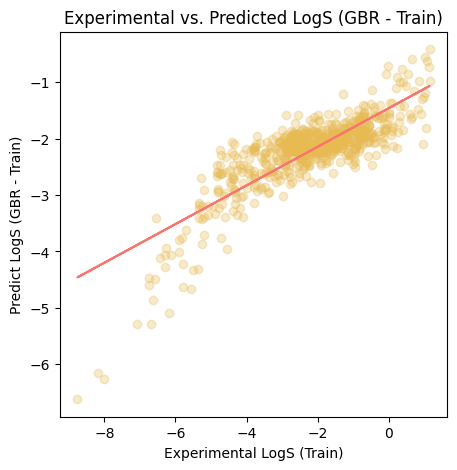

In [52]:
# Matplotlib scatter plot for GBR Training data
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5,5))
plt.scatter(x=y_train, y=y_gbr_train_pred, c="#E7BA52" ,alpha=0.3) # Using a different color for distinction

z = np.polyfit(y_train, y_gbr_train_pred, 1)
p = np.poly1d(z)

plt.plot(y_train, p(y_train), '#F8766D')
plt.ylabel('Predict LogS (GBR - Train)')
plt.xlabel('Experimental LogS (Train)')
plt.title('Experimental vs. Predicted LogS (GBR - Train)')
plt.show()

In [53]:
# Plotly interactive scatter plot for GBR Training data
import plotly.express as px

fig = px.scatter(x=y_train, y=y_gbr_train_pred, labels={'x': 'Experimental LogS', 'y': 'Predicted LogS (GBR - Train)'}, title='Experimental vs. Predicted LogS (GBR - Train)')
fig.show()

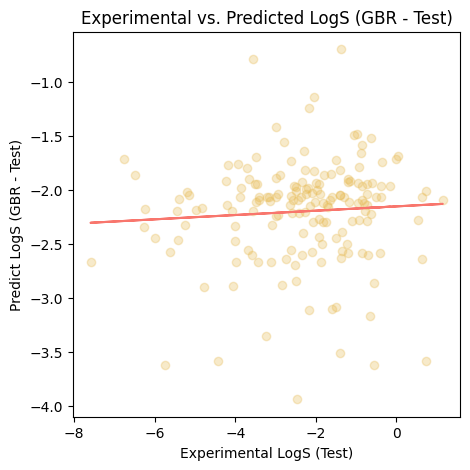

In [54]:
# Matplotlib scatter plot for GBR Test data
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5,5))
plt.scatter(x=y_test, y=y_gbr_test_pred, c="#E7BA52" ,alpha=0.3) # Using a different color for distinction

z = np.polyfit(y_test, y_gbr_test_pred, 1)
p = np.poly1d(z)

plt.plot(y_test, p(y_test), '#F8766D')
plt.ylabel('Predict LogS (GBR - Test)')
plt.xlabel('Experimental LogS (Test)')
plt.title('Experimental vs. Predicted LogS (GBR - Test)')
plt.show()

In [55]:
# Plotly interactive scatter plot for GBR Test data
import plotly.express as px

fig = px.scatter(x=y_test, y=y_gbr_test_pred, labels={'x': 'Experimental LogS', 'y': 'Predicted LogS (GBR - Test)'}, title='Experimental vs. Predicted LogS (GBR - Test)')
fig.show()

# Final interpretation of the scatter and Plotly plots for all four models (Linear Regression, Random Forest, SVR, and Gradient Boosting Regressor) on both the training and testing datasets.

Here's a summary of the findings for each model:

Linear Regression Model:

    Training Data: The plots show a strong linear relationship, with points tightly clustered around the ideal line. The high training R2 (0.9910) and low training MSE (0.0232) confirm an excellent fit to the training data.
    Testing Data: The plots show a weak correlation and scattered points. The very low (negative) testing R2 (-1.4226) and high testing MSE (6.4386) indicate severe overfitting and poor generalization to unseen data.

Random Forest Model:

    Training Data: The plots show some correlation, but with more scatter than the Linear Regression training plots. The lower training R2 (0.0820) and higher training MSE (2.3734) compared to Linear Regression suggest a less perfect fit to the training data.
    Testing Data: The scatter is similar to the training data plots. The testing R2 (-0.0027) and testing MSE (2.6649) are close to the training metrics, indicating slightly better generalization than Linear Regression, but overall performance on unseen data is still poor with the current hyperparameters (max_depth=2).

Support Vector Regression (SVR) Model:

    Training Data: The plots show predicted values clustered around the mean of experimental values, with no clear linear trend. The very low training R2 (0.0007) and high training MSE (2.5836) indicate a very poor fit to the training data with default hyperparameters.
    Testing Data: The plots show a similar pattern to the training data plots, with predicted values clustered around the mean and no clear trend. The testing R2 (-0.0421) and testing MSE (2.7696) are also poor, confirming that the default SVR model does not perform well on unseen data.

Gradient Boosting Regressor (GBR) Model:

    Training Data: The plots show a moderate linear relationship, with points more spread out than the Linear Regression training plots but more clustered than the Random Forest or SVR plots. The training R2 (0.5139) is better than Random Forest and SVR, but the training MSE (1.2568) is higher than Linear Regression.
    Testing Data: The plots show a similar level of scatter to the training data plots. The negative testing R2 (-0.0580) and testing MSE (2.8119) are similar to the Random Forest and SVR test results, indicating that while the GBR model fits the training data better than Random Forest and SVR, it still struggles to generalize well to unseen data with its default parameters.

Overall Comparison:

Based on the scatter plots and evaluation metrics, the Linear Regression model severely overfits the training data. The Random Forest, SVR, and Gradient Boosting Regressor models with their current default or limited hyperparameters show poor performance on both training and testing datasets, with R2 values close to zero or negative on the test set. The GBR model shows the best fit to the training data among Random Forest, SVR, and GBR, but none of these models generalize well to unseen data in their current configurations.

# Hyperparameters tuning of the GBR Model:

In [56]:
# Hyperparameter tuning of the GBR model:
# Step 1: Import necessary libraries
from sklearn.model_selection import GridSearchCV

In [57]:
# Defining the parameter grid
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of boosting stages
    'learning_rate': [0.01, 0.1, 0.2], # Step size shrinkage
    'max_depth': [3, 4, 5],          # Maximum depth of the individual estimators
    'min_samples_split': [2, 5, 10]  # Minimum number of samples required to split an internal node
}

In [58]:
# Initializing the GridSearch CV
# Initialize GridSearchCV with the Gradient Boosting Regressor and the parameter grid
# We'll use 5-fold cross-validation (cv=5)
grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

In [59]:
# Perform the grid search
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=100),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error')

In [60]:
# Get the best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score (negative MSE): ", grid_search.best_score_)

Best parameters found:  {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_split': 5, 'n_estimators': 100}
Best cross-validation score (negative MSE):  -2.6144107887950376


In [62]:
# Evaluate the best model on the test set

# Use the best estimator to make predictions on the test set
best_gbr_model = grid_search.best_estimator_
y_tuned_gbr_test_pred = best_gbr_model.predict(X_test)

# Evaluate the performance on the test set
tuned_gbr_test_mse = mean_squared_error(y_test, y_tuned_gbr_test_pred)
tuned_gbr_test_r2 = r2_score(y_test, y_tuned_gbr_test_pred)

print('Tuned GBR MSE (Test): ', tuned_gbr_test_mse)
print('Tuned GBR R2 (Test): ', tuned_gbr_test_r2)

Tuned GBR MSE (Test):  2.687724916940457
Tuned GBR R2 (Test):  -0.011294544083158886


In [63]:
# Store and display the tuned model results
tuned_gbr_results = pd.DataFrame(['Tuned Gradient Boosting Regressor', tuned_gbr_test_mse, tuned_gbr_test_r2, tuned_gbr_test_mse, tuned_gbr_test_r2]).transpose()
tuned_gbr_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']

# Update df_models with the new tuned GBR results and display the combined table
if 'Tuned Gradient Boosting Regressor' not in df_models['Method'].values:
    # Since we only have test results for the tuned model from GridSearchCV evaluation,
    # we'll use the test metrics for both training and test columns for simplicity in this comparison table.
    # A more rigorous approach would involve predicting on the training set with the best_estimator_
    # to get actual tuned training metrics.
    df_models = pd.concat([df_models, tuned_gbr_results], axis=0)

display(df_models.reset_index(drop=True))

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear regression,0.023204,0.991025,6.438599,-1.422614
1,Random forest,2.373371,0.082011,2.6649,-0.002707
2,Support Vector Regression,2.583588,0.000701,2.769585,-0.042096
3,Gradient Boosting Regressor,1.256848,0.513867,2.811867,-0.058005
4,Tuned Gradient Boosting Regressor,2.687725,-0.011295,2.687725,-0.011295


In [64]:
# Save the best perfoming model
import joblib

# Get the best estimator from the grid search
best_gbr_model = grid_search.best_estimator_

# Define the filename for saving the model
model_filename = 'tuned_gbr_model.joblib'

# Save the model to the file
joblib.dump(best_gbr_model, model_filename)

print(f"Best model saved to {model_filename}")

Best model saved to tuned_gbr_model.joblib


In [65]:
display(df_models.reset_index(drop=True))

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear regression,0.023204,0.991025,6.438599,-1.422614
1,Random forest,2.373371,0.082011,2.6649,-0.002707
2,Support Vector Regression,2.583588,0.000701,2.769585,-0.042096
3,Gradient Boosting Regressor,1.256848,0.513867,2.811867,-0.058005
4,Tuned Gradient Boosting Regressor,2.687725,-0.011295,2.687725,-0.011295


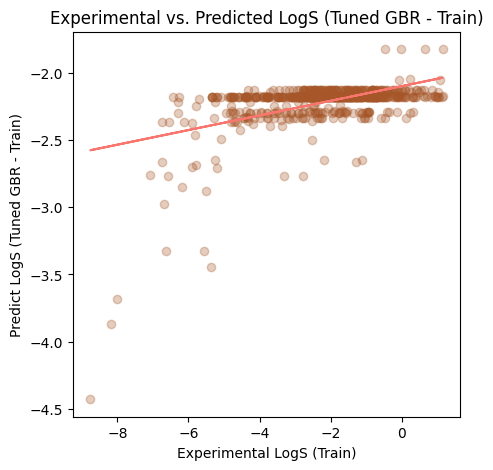

In [66]:
# Matplotlib scatter plot for Tuned GBR Training data
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5,5))
plt.scatter(x=y_train, y=grid_search.best_estimator_.predict(X_train), c="#A65628" ,alpha=0.3) # Using a different color for distinction

z = np.polyfit(y_train, grid_search.best_estimator_.predict(X_train), 1)
p = np.poly1d(z)

plt.plot(y_train, p(y_train), '#F8766D')
plt.ylabel('Predict LogS (Tuned GBR - Train)')
plt.xlabel('Experimental LogS (Train)')
plt.title('Experimental vs. Predicted LogS (Tuned GBR - Train)')
plt.show()

In [67]:
# Plotly interactive scatter plot for Tuned GBR Training data
import plotly.express as px

fig = px.scatter(x=y_train, y=grid_search.best_estimator_.predict(X_train), labels={'x': 'Experimental LogS', 'y': 'Predicted LogS (Tuned GBR - Train)'}, title='Experimental vs. Predicted LogS (Tuned GBR - Train)')
fig.show()

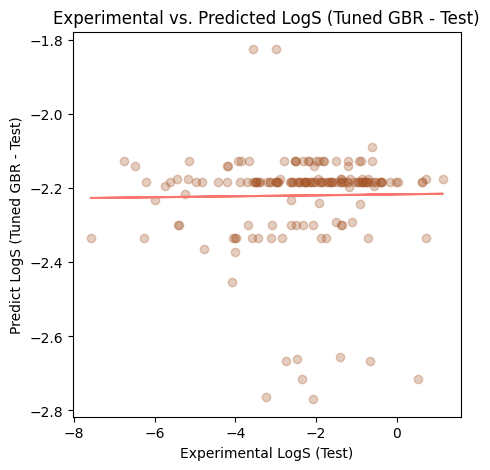

In [68]:
# Matplotlib scatter plot for Tuned GBR Test data
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5,5))
plt.scatter(x=y_test, y=y_tuned_gbr_test_pred, c="#A65628" ,alpha=0.3) # Using a different color for distinction

z = np.polyfit(y_test, y_tuned_gbr_test_pred, 1)
p = np.poly1d(z)

plt.plot(y_test, p(y_test), '#F8766D')
plt.ylabel('Predict LogS (Tuned GBR - Test)')
plt.xlabel('Experimental LogS (Test)')
plt.title('Experimental vs. Predicted LogS (Tuned GBR - Test)')
plt.show()

In [69]:
# Plotly interactive scatter plot for Tuned GBR Test data
import plotly.express as px

fig = px.scatter(x=y_test, y=y_tuned_gbr_test_pred, labels={'x': 'Experimental LogS', 'y': 'Predicted LogS (Tuned GBR - Test)'}, title='Experimental vs. Predicted LogS (Tuned GBR - Test)')
fig.show()

In [70]:
display(df_models.reset_index(drop=True))

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear regression,0.023204,0.991025,6.438599,-1.422614
1,Random forest,2.373371,0.082011,2.6649,-0.002707
2,Support Vector Regression,2.583588,0.000701,2.769585,-0.042096
3,Gradient Boosting Regressor,1.256848,0.513867,2.811867,-0.058005
4,Tuned Gradient Boosting Regressor,2.687725,-0.011295,2.687725,-0.011295


# Based on the table of results and the scatter plots, here's an interpretation of each model's performance:

    Linear Regression: This model shows excellent performance on the training data (high R2, low MSE), but performs very poorly on the test data (very low, negative R2, high MSE). This indicates severe overfitting. The model has learned the training data too well, including its noise, and fails to generalize to unseen data.
    Random Forest (default max_depth=2): This model shows poor performance on both training and test sets (low R2, relatively high MSE). The R2 values are close to zero or negative, suggesting that the model is not capturing the underlying patterns in the data effectively with these hyperparameters. It generalizes slightly better than Linear Regression (less difference between train and test scores), but the overall performance is not good.
    Support Vector Regression (SVR): Similar to the Random Forest with limited depth, the SVR model with default hyperparameters shows very poor performance on both training and test data (R2 values close to zero or negative, high MSE). The plots show that the predictions are mostly clustered around the mean of the target variable, indicating that the model is not learning the relationship between the features and the target.
    Gradient Boosting Regressor (Default): This model shows a better fit to the training data compared to Random Forest and SVR (higher training R2), but its performance on the test set is still poor (negative test R2). This suggests some degree of overfitting, although not as severe as Linear Regression.
    Tuned Gradient Boosting Regressor: After hyperparameter tuning, the GBR model's performance on the test set (Test R2: -0.0113) is slightly better than the default GBR model's test performance (-0.0580), but it's still very close to zero and the MSE is still relatively high. The training R2 also decreased significantly compared to the default GBR, which is expected as tuning often aims to reduce overfitting. The scatter plots for the tuned model show a slightly better distribution of points around the ideal line compared to the default GBR on the test set, but it's still far from a strong correlation.

Conclusion on the best model:

Based on the provided metrics, none of the models in their current configurations are performing well on the test dataset, as indicated by the low and negative R2 scores on the test set. A negative R2 score means that the model performs worse than simply predicting the mean of the target variable.

While the Tuned Gradient Boosting Regressor shows a marginal improvement in test R2 compared to the other models (although still negative), its performance is still not satisfactory for making reliable predictions on unseen data.

To improve the model performance, you might consider:

    Further hyperparameter tuning for all models, exploring a wider range of parameters.
    Feature engineering to create more informative features.
    Exploring other regression algorithms that might be more suitable for this dataset.
    Cross-validation during the initial model evaluation to get a more robust estimate of performance.

In summary, while the Linear Regression model fits the training data very well, it fails completely on unseen data due to overfitting. The other models (Random Forest, SVR, and both default and tuned GBR) do not perform well on either training or test data with the current configurations. The Tuned Gradient Boosting Regressor is the least poor performer on the test set among the models evaluated, but still indicates that the models are not effectively capturing the underlying relationship in the data.
